In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.12.0


In [ ]:
fashion_mnist= tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels)= fashion_mnist.load_data()


In [ ]:
class_names=['T-shirt/top','Trouser','pullover', 'Dress','Coat','sandal',
             'Shirt','Sneaker','Bag','Ankle boot']

train_images.shape
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
test_images.shape

(10000, 28, 28)

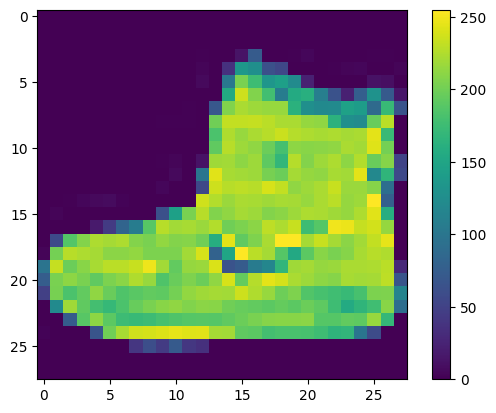

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
train_images= train_images/255.0
test_images = train_images/255.0


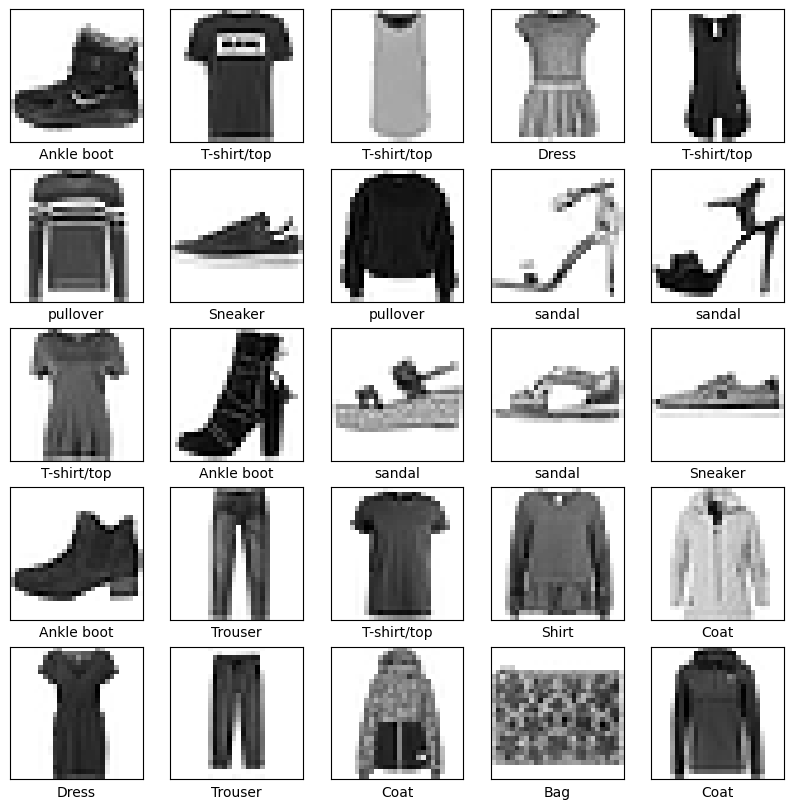

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i],cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4966 - accuracy: 0.8241
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3720 - accuracy: 0.8653
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3350 - accuracy: 0.8778
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3140 - accuracy: 0.8856
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2927 - accuracy: 0.8925
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2792 - accuracy: 0.8970
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2675 - accuracy: 0.9020
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2562 - accuracy: 0.9053
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2464 - accuracy: 0.9089
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.239

In [ ]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

predictions = probability_model.predict(test_images)



1875/1875 [==============================] - 3s 2ms/step


In [ ]:
np.argmax(predictions[0])


5

In [ ]:
predictions[0]

array([4.1104127e-02, 2.7786577e-04, 5.6735449e-03, 1.2832756e-02,
       2.5531694e-03, 8.9995760e-01, 3.2751624e-02, 2.2588247e-03,
       2.3382111e-03, 2.5240800e-04], dtype=float32)

In [ ]:
np.argmax(predictions[0])

5

In [ ]:
def plot_image(i, predictions_array,true_label, img):
  true_label, img = true_label[i],img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label= np.argmax(predictions_array)
  if predicted_label == true_label:
    color='blue'
  else:
    color= 'red'
  plt.xlabel("{}{:2.0f}%({})".format(class_names[predicted_label],
                                     100*np.max(predictions_array),
                                     class_names[true_label]),color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label= true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot=plt.bar(range(10),predictions_array, color="#777777")
  plt.ylim([0,1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

<function matplotlib.pyplot.show(close=None, block=None)>

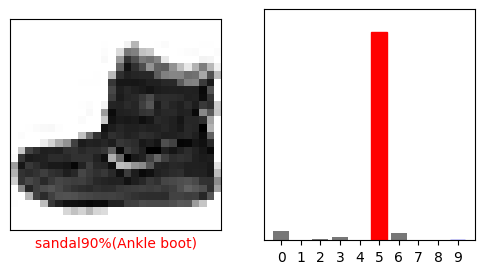

In [ ]:
i=0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show

In [ ]:
test_label

NameError: ignored

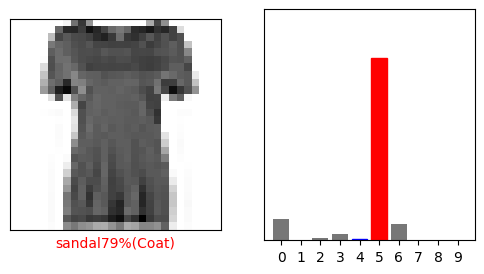

In [ ]:
i=10
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()